In [226]:
import sys
# ^^^ pyforest auto-imports - don't write above this line
from pyforest import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier as KNN
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
    
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

<IPython.core.display.Javascript object>

In [227]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

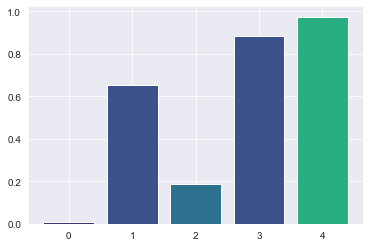

In [228]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from numpy.random import rand
 
data = [1,2,3,2,5,7,7,8,8]
fig, ax = plt.subplots(1, 1)
 
# Get a color map
my_cmap = cm.get_cmap('viridis')
 
# Get normalize function (takes data in range [vmin, vmax] -> [0, 1])
my_norm = Normalize(vmin=0, vmax=8)
 
ax.bar(range(5), rand(5), color=my_cmap(my_norm(data)))
plt.show()

# Read The Data

In [229]:
df = pd.read_csv('IBM_HR_Data.csv')
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,Application ID,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
0,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,123456,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
1,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,1,123458,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
2,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,7,123462,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
3,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,8,123463,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral
4,41.0,Voluntary Resignation,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,1,9,123464,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,8.0,Y,Yes,11,3.0,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral


In [230]:
df.shape

(23436, 37)

# check for ay null values

In [231]:

df.isnull().sum()[df.isnull().sum()!=0]

Age                          3
Attrition                   13
BusinessTravel               8
DailyRate                   12
Department                  11
DistanceFromHome             9
Education                   12
EducationField               9
EmployeeCount                5
EmployeeNumber               1
Application ID               3
EnvironmentSatisfaction      9
Gender                      10
HourlyRate                   9
JobInvolvement               9
JobLevel                     7
JobRole                      9
JobSatisfaction              9
MaritalStatus               11
MonthlyIncome               13
MonthlyRate                 11
NumCompaniesWorked           9
Over18                      10
OverTime                    12
PercentSalaryHike           14
PerformanceRating           10
RelationshipSatisfaction     8
StandardHours               10
StockOptionLevel             9
TotalWorkingYears            8
TrainingTimesLastYear       11
WorkLifeBalance             10
YearsAtC

In [232]:
Null_values_percentage=(df.isnull().sum().sum()/len(df))*100
Null_values_percentage

1.5019627922853729

* **So in Our Data there are 1.5% of Null Values**
* **Insted of computing them we can directly DROP them bcz Dropped % of Null values is very less It wont affect our Momdel**

In [233]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,23433.0,36.936671,9.137432,18.0,30.0,36.0,43.0,60.0
DailyRate,23424.0,801.828765,403.206166,102.0,465.0,802.0,1157.0,1499.0
Education,23424.0,2.910050,1.024931,1.0,2.0,3.0,4.0,6.0
EnvironmentSatisfaction,23427.0,13.681777,1186.544372,1.0,2.0,3.0,4.0,129588.0
JobInvolvement,23427.0,2.733811,0.836860,1.0,2.0,3.0,3.0,54.0
JobLevel,23429.0,2.064023,1.105421,1.0,1.0,2.0,3.0,5.0
MonthlyRate,23425.0,14304.343821,7102.636293,2094.0,8053.0,14222.0,20460.0,26999.0
NumCompaniesWorked,23427.0,3.887779,155.332904,0.0,1.0,2.0,4.0,23258.0
PerformanceRating,23426.0,3.155852,0.371215,3.0,3.0,3.0,3.0,13.0
RelationshipSatisfaction,23428.0,2.713334,1.080030,1.0,2.0,3.0,4.0,4.0


* **We can See some Outliers are present in the data We can remove them if Model isnot performing well.**

# Removal of Outliers

In [234]:
df.loc[(df.EnvironmentSatisfaction>df.EnvironmentSatisfaction.quantile(0.9))]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,Application ID,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
15655,33.0,Current employee,Travel_Frequently,NaN,1296,Research & Development,6.0,3,Marketing,1,3794,127249.0,1,Male,47.0,3.0,5,Manager,4,Married,19232.0,4933.0,1,Y,No,11.0,3.0,4.0,80.0,0.0,22.0,3.0,3.0,22.0,17.0,11.0,15
17027,44.0,Current employee,Non-Travel,111.0,Research & Development,17,3.0,Medical,1,NaN,6133,129588.0,2,Female,54.0,3.0,4,Manager,4,Single,16659.0,23258.0,1,Y,Yes,13.0,3.0,3.0,80.0,0.0,30.0,2.0,3.0,5.0,4.0,1.0,2


In [235]:
df.loc[(df.NumCompaniesWorked>10)] 
#Even if some of Lives Entire life Working No one can work at this much companies at One Life 
#We can Replace them Max 10 companies 

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,Application ID,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
15655,33.0,Current employee,Travel_Frequently,NaN,1296,Research & Development,6.0,3,Marketing,1,3794,127249.0,1,Male,47.0,3.0,5,Manager,4,Married,19232.0,4933.0,1,Y,No,11.0,3.0,4.0,80.0,0.0,22.0,3.0,3.0,22.0,17.0,11.0,15
17027,44.0,Current employee,Non-Travel,111.0,Research & Development,17,3.0,Medical,1,NaN,6133,129588.0,2,Female,54.0,3.0,4,Manager,4,Single,16659.0,23258.0,1,Y,Yes,13.0,3.0,3.0,80.0,0.0,30.0,2.0,3.0,5.0,4.0,1.0,2


In [236]:
df.loc[(df.EnvironmentSatisfaction>df.NumCompaniesWorked.quantile(0.9))]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,Application ID,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
15655,33.0,Current employee,Travel_Frequently,NaN,1296,Research & Development,6.0,3,Marketing,1,3794,127249.0,1,Male,47.0,3.0,5,Manager,4,Married,19232.0,4933.0,1,Y,No,11.0,3.0,4.0,80.0,0.0,22.0,3.0,3.0,22.0,17.0,11.0,15
17027,44.0,Current employee,Non-Travel,111.0,Research & Development,17,3.0,Medical,1,NaN,6133,129588.0,2,Female,54.0,3.0,4,Manager,4,Single,16659.0,23258.0,1,Y,Yes,13.0,3.0,3.0,80.0,0.0,30.0,2.0,3.0,5.0,4.0,1.0,2


In [237]:
df.loc[(df.PerformanceRating>4),'PerformanceRating']
#Here performance Rating Cant be greater than 5 hence we will also cap them with max value.

15655    11.0
17027    13.0
Name: PerformanceRating, dtype: float64

In [238]:
df.loc[(df.JobInvolvement>5)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,Application ID,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source
15655,33.0,Current employee,Travel_Frequently,NaN,1296,Research & Development,6.0,3,Marketing,1,3794,127249.0,1,Male,47.0,3.0,5,Manager,4,Married,19232.0,4933.0,1,Y,No,11.0,3.0,4.0,80.0,0.0,22.0,3.0,3.0,22.0,17.0,11.0,15
17027,44.0,Current employee,Non-Travel,111.0,Research & Development,17,3.0,Medical,1,NaN,6133,129588.0,2,Female,54.0,3.0,4,Manager,4,Single,16659.0,23258.0,1,Y,Yes,13.0,3.0,3.0,80.0,0.0,30.0,2.0,3.0,5.0,4.0,1.0,2


If we look at the Indexs of all the rows which are giving many outliers Those are same 
Alternatively We can drop this Two Rows or Cap there outliers values from Data 
So here I have capped those values with the Respective row maximum Values.

In [239]:
global y
y = df.NumCompaniesWorked.quantile(0.9)
def capping(x):
    
    if x > y:
        x=y
    return x
df.NumCompaniesWorked=df.NumCompaniesWorked.apply(capping)
df.NumCompaniesWorked.value_counts()

1.0    8311
0.0    3176
7.0    2784
3.0    2508
2.0    2330
4.0    2208
6.0    1108
5.0    1002
Name: NumCompaniesWorked, dtype: int64

In [240]:
global y
y = df.EnvironmentSatisfaction.quantile(0.9)
def capping(x):
    
    if x > y:
        x=y
    return x
df.EnvironmentSatisfaction=df.EnvironmentSatisfaction.apply(capping)
df.EnvironmentSatisfaction.value_counts()

3.0    7196
4.0    7112
1.0    4580
2.0    4539
Name: EnvironmentSatisfaction, dtype: int64

In [241]:
global y
y = df.PerformanceRating.quantile(0.9)
def capping(x):
    
    if x > y:
        x=y
    return x
df.PerformanceRating=df.PerformanceRating.apply(capping)
df.PerformanceRating.value_counts()

3.0    19791
4.0     3635
Name: PerformanceRating, dtype: int64

In [242]:
global y
y = df.JobInvolvement.quantile(0.9)
def capping(x):
    
    if x > y:
        x=y
    return x
df.JobInvolvement=df.JobInvolvement.apply(capping)
df.JobInvolvement.value_counts()

3.0    16135
2.0     5973
1.0     1319
Name: JobInvolvement, dtype: int64

In [243]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,23433.0,36.936671,9.137432,18.0,30.0,36.0,43.0,60.0
DailyRate,23424.0,801.828765,403.206166,102.0,465.0,802.0,1157.0,1499.0
Education,23424.0,2.910050,1.024931,1.0,2.0,3.0,4.0,6.0
EnvironmentSatisfaction,23427.0,2.718829,1.095596,1.0,2.0,3.0,4.0,4.0
JobInvolvement,23427.0,2.632433,0.587436,1.0,2.0,3.0,3.0,3.0
JobLevel,23429.0,2.064023,1.105421,1.0,1.0,2.0,3.0,5.0
MonthlyRate,23425.0,14304.343821,7102.636293,2094.0,8053.0,14222.0,20460.0,26999.0
NumCompaniesWorked,23427.0,2.581338,2.270676,0.0,1.0,2.0,4.0,7.0
PerformanceRating,23426.0,3.155169,0.362074,3.0,3.0,3.0,3.0,4.0
RelationshipSatisfaction,23428.0,2.713334,1.080030,1.0,2.0,3.0,4.0,4.0


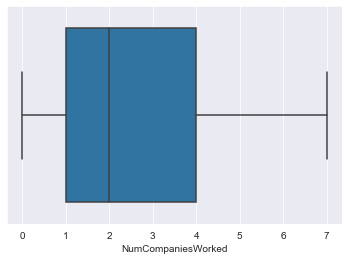

In [244]:
import seaborn as sns
sns.boxplot(x=df['NumCompaniesWorked'])

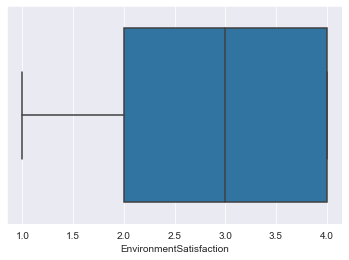

In [245]:
import seaborn as sns
sns.boxplot(x=df['EnvironmentSatisfaction'])

In [246]:
#Copied Original Dataset before EDA

In [247]:
df2=df.copy(deep=True) 

In [248]:
b = df.shape
b

(23436, 37)

# Dropping Null Values.

In [249]:
df=df.dropna() #Total 1.5% Null values are available In dataset.

In [250]:
df.isnull().sum().shape

(37,)

In [251]:
a = df2.dropna().shape,
a,a[0][0]

(((23204, 37),), 23204)

In [252]:
(b[0]-a[0][0])

232

In [253]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
Application ID              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

* **227 Are  Null values Present in our Dataset**
* **Our Dataset Is Large so even If We Drop Null value rows from  Our Dataset it wont affect our Model Accuracy.**

In [254]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,23204.0,36.919540,9.116600,18.0,30.0,36.0,43.0,60.0
DailyRate,23204.0,802.328349,403.193041,102.0,465.0,802.0,1157.0,1499.0
Education,23204.0,2.908723,1.024811,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,23204.0,2.719057,1.095208,1.0,2.0,3.0,4.0,4.0
JobInvolvement,23204.0,2.632693,0.587639,1.0,2.0,3.0,3.0,3.0
JobLevel,23204.0,2.065032,1.105769,1.0,1.0,2.0,3.0,5.0
MonthlyRate,23204.0,14303.508533,7099.381683,2094.0,8053.0,14222.0,20460.0,26999.0
NumCompaniesWorked,23204.0,2.585546,2.272585,0.0,1.0,2.0,4.0,7.0
PerformanceRating,23204.0,3.155232,0.362133,3.0,3.0,3.0,3.0,4.0
RelationshipSatisfaction,23204.0,2.713067,1.080830,1.0,2.0,3.0,4.0,4.0


In [255]:
#Mapped Categorial values from Target column to NUMERICAL VALUES for Model UnderStanding.

In [256]:
df.Attrition=df.Attrition.apply(lambda x: 1 if x=='Voluntary Resignation' else 0)
df.Attrition.value_counts()

0    19530
1     3674
Name: Attrition, dtype: int64

In [257]:
df.to_csv('HR_Analyst_new.csv') #Saved Final File after Cleaning of Data. 

In [258]:
#by looking at this we can that our models base accuracy is 0.8118%
round((df.Attrition.value_counts()[0]-df.Attrition.value_counts()[1])/df.Attrition.value_counts()[0],2)

0.81

**#Till Here We have droped Null Values and Saved the file for Visualisation.**

**df.to_csv('tableau1.csv')
after This we are going for EDA ,univariate,bivariate analysis.**

**#Here We have checked For Numerical and categorical Columns Presnet In Dataset**

In [259]:
numeric_ = df.select_dtypes(exclude=['object']).copy()
categor_ = df.select_dtypes(['object']).copy()
print(color.BOLD+'\033[91M CATEGORICAL COLUMNS- :'+color.END,categor_.columns,color.BOLD+'\nShape of Categorical Data-:'+color.END,categor_.shape)
print(color.BOLD+'NUMERICAL COLUMNS-: '+color.END,numeric_.columns,color.BOLD+'\nShape of Categorical Data-:'+color.END,numeric_.shape)

 CATEGORICAL COLUMNS- : Index(['BusinessTravel', 'Department', 'DistanceFromHome', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'Application ID', 'Gender',
       'HourlyRate', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'Over18', 'OverTime', 'PercentSalaryHike',
       'Employee Source'],
      dtype='object') 
Shape of Categorical Data-: (23204, 17)
NUMERICAL COLUMNS-:  Index(['Age', 'Attrition', 'DailyRate', 'Education', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'MonthlyRate', 'NumCompaniesWorked',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object') 
Shape of Categorical Data-: (23204, 20)


# DATA VISUALIZATION

Text(0.5, 1.0, 'Attrition')

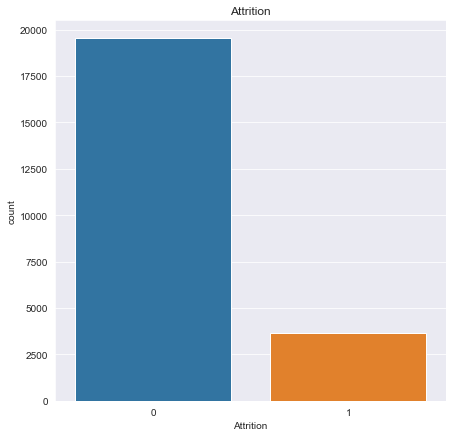

In [260]:
sns.countplot(df['Attrition'])
fig = plt.gcf()
fig.set_size_inches(7,7)
plt.title('Attrition')

In [261]:
corr= numeric_.corr()

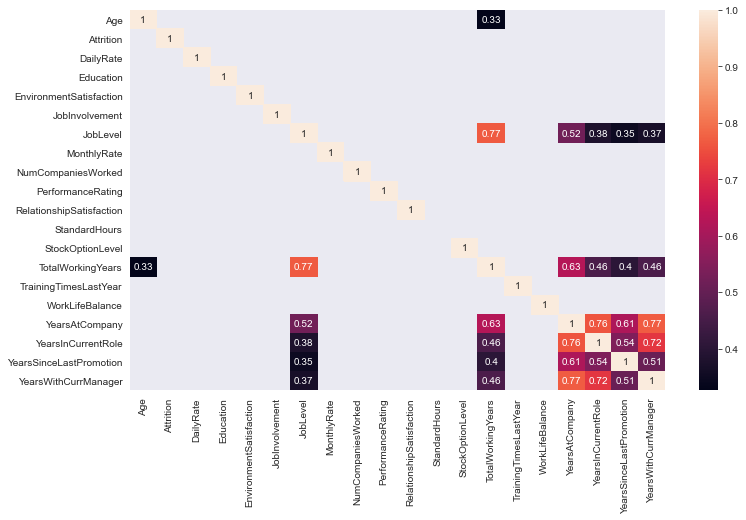

In [262]:
plt.subplots(figsize=[12,7])
sns.heatmap(corr,annot=True,mask=numeric_.corr()<0.3)

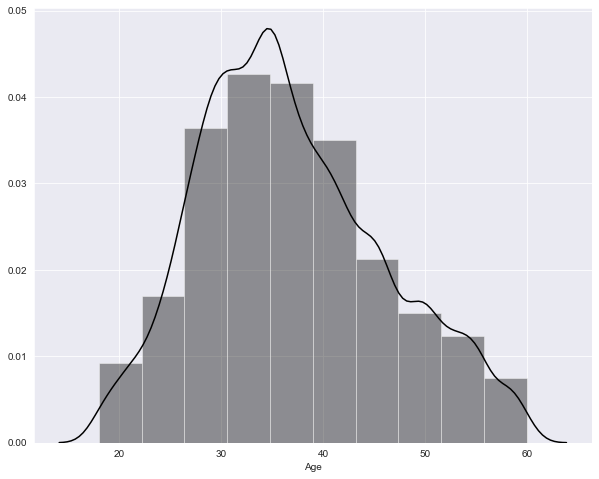

In [263]:
plt.figure(figsize=[10,8])
sns.distplot(df['Age'],hist=True,kde=True,color='k',bins=10)

In [264]:
# Majority of employees lie between the age range of 30 to 40

In [265]:
df['Age'].value_counts()

35.0    1218
34.0    1210
36.0    1101
31.0    1079
29.0    1073
32.0     956
30.0     950
38.0     941
33.0     917
40.0     871
37.0     795
27.0     772
28.0     752
42.0     734
39.0     659
45.0     644
41.0     643
26.0     602
44.0     525
46.0     518
43.0     511
50.0     477
24.0     416
25.0     411
47.0     383
49.0     382
55.0     328
53.0     308
48.0     301
51.0     301
52.0     287
54.0     285
22.0     257
58.0     223
23.0     223
56.0     220
21.0     211
20.0     174
59.0     148
19.0     130
18.0     127
60.0      80
57.0      61
Name: Age, dtype: int64

In [266]:
df.Attrition.value_counts()
#converting object to Numric

0    19530
1     3674
Name: Attrition, dtype: int64

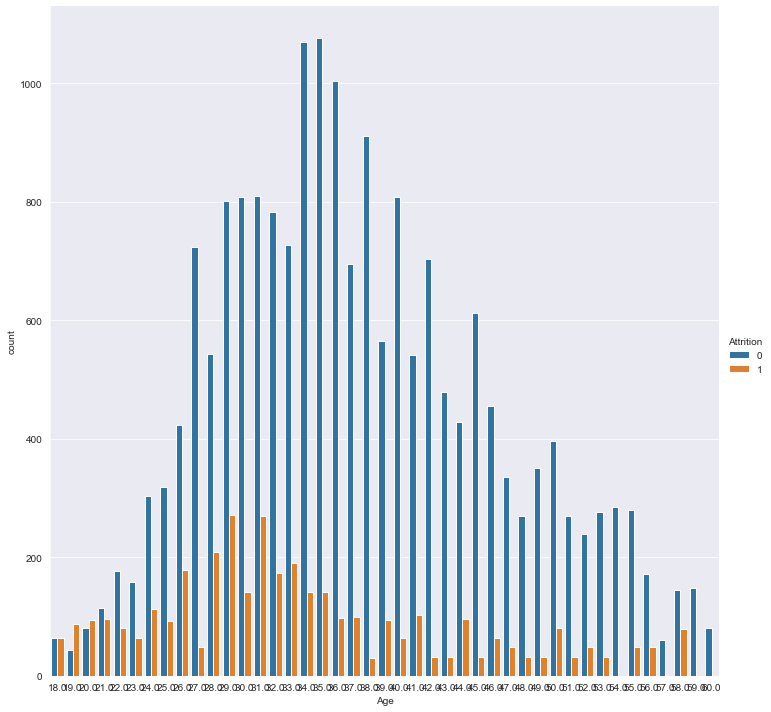

In [267]:
sns.catplot(x='Age',hue='Attrition',data=df,kind='count',height=10)

In [268]:
df.EducationField.value_counts()

Life Sciences       9578
Medical             7297
Marketing           2526
Technical Degree    2055
Other               1304
Human Resources      443
Test                   1
Name: EducationField, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

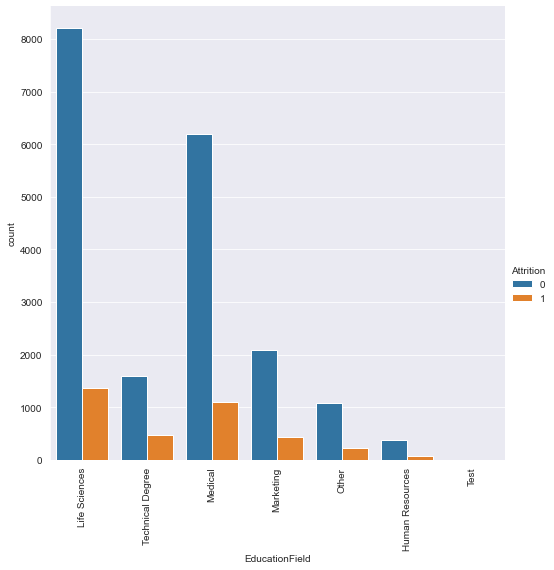

In [269]:
sns.catplot(x='EducationField',hue='Attrition',kind='count',data=df,height=7)
plt.xticks(rotation=90)

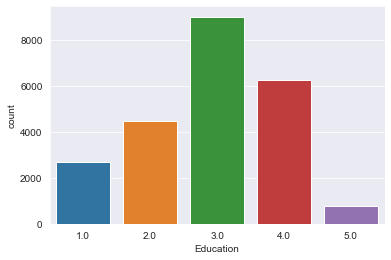

In [270]:
df['Education'].value_counts()
sns.countplot(df['Education'])

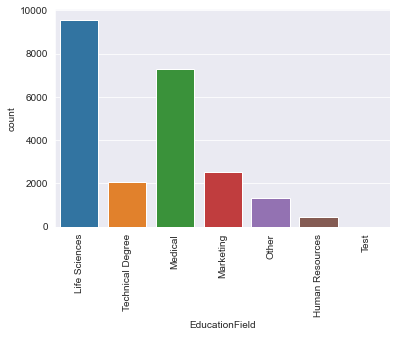

In [271]:
plt.xticks(rotation='vertical')
sns.countplot(df['EducationField'])

In [272]:
# Around 30% of employees have education level of 3 and 
# Around 70% of employees are having 'Life Sciences' and 'Medical' education field.

In [273]:
# For both male and female,attrition rate is higher for education level 1,2 and 3.

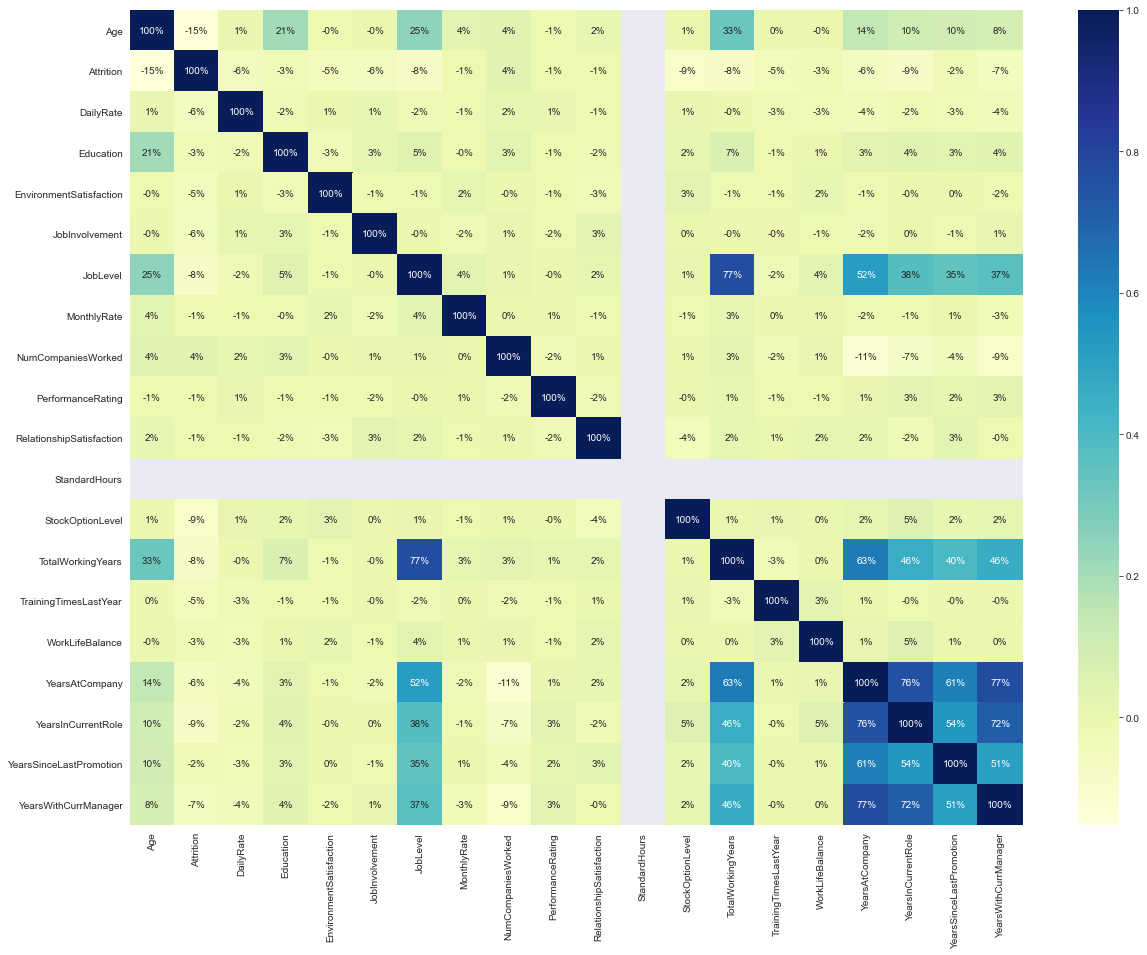

In [274]:
corr=df.corr()
import  seaborn as sns 
plt.figure(figsize=[20,15])
sns.heatmap(corr,annot=True,cmap='YlGnBu',fmt='.0%')

In [275]:
#Dropped Unnecessary Columns from Dataset.

In [276]:
df=df.drop(['Over18','EmployeeNumber','StandardHours','EmployeeCount'],axis=1)

In [277]:
df['Age_emp']=df.Age

In [278]:
df.drop('Age',axis=1,inplace=True)

In [279]:
df.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,Application ID,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source,Age_emp
0,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,123456,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,7.0,Yes,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral,41.0
1,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,123458,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Yes,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral,41.0
2,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,123462,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,7.0,Yes,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral,41.0
3,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,123463,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,Yes,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral,41.0
4,1,Travel_Rarely,1102.0,Sales,1,2.0,Life Sciences,123464,2.0,Female,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,7.0,Yes,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral,41.0


In [280]:
df.BusinessTravel.value_counts()

Travel_Rarely        16457
Travel_Frequently     4376
Non-Travel            2371
Name: BusinessTravel, dtype: int64

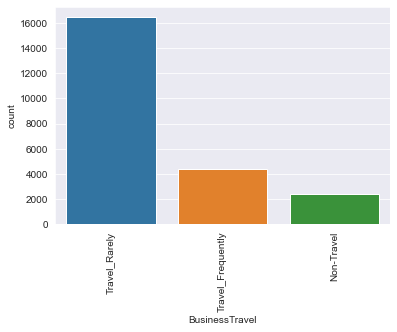

In [281]:
plt.xticks(rotation='vertical')
sns.countplot(df['BusinessTravel'])

In [282]:
# BusinessTravel We can see that Employee who Travel rarely there count is Higher.

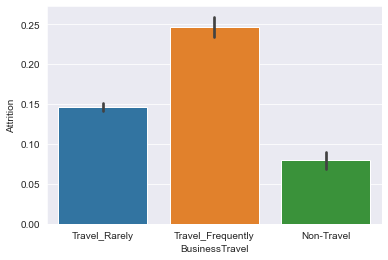

In [283]:
sns.barplot(df.BusinessTravel,df.Attrition,data=df)

In [284]:
#People Who travel More there attrition Rate is Higher 

In [45]:
df.Department.value_counts()

Research & Development    15132
Sales                      7059
Human Resources            1013
Name: Department, dtype: int64

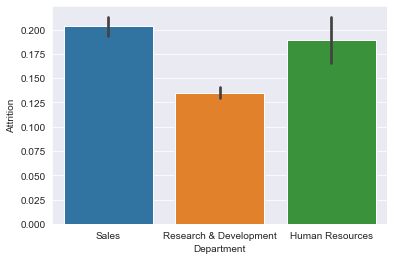

In [285]:
sns.barplot(df.Department,df.Attrition,data=df)

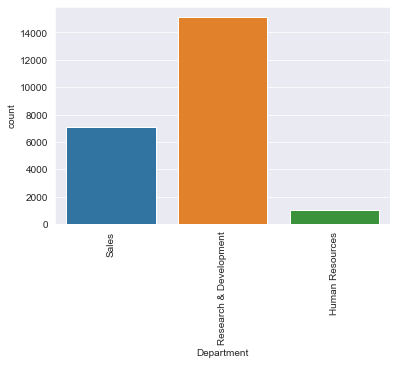

In [286]:
plt.xticks(rotation='vertical')
sns.countplot(df['Department'])

In [ ]:
#R&D DepaDepartments has Maximum NUmber of Employees.

In [287]:
df.DistanceFromHome.value_counts()

1       2383
2       2063
2.0     1239
3       1022
10       978
7        967
9        952
8        925
1.0      897
5        803
4        694
6        685
10.0     381
9.0      373
7.0      363
16       353
8.0      345
11       335
23       324
3.0      324
4.0      320
24       320
15       295
18       287
13       272
6.0      257
19       255
25       254
20       238
29       238
21       238
17       223
5.0      220
22       219
26.0     217
28       207
12       193
29.0     191
14       190
26       178
28.0     156
16.0     147
27       147
14.0     143
25.0     140
12.0     137
20.0     137
18.0     131
11.0     126
15.0     124
24.0     110
23.0     104
19.0      96
22.0      85
17.0      77
27.0      47
21.0      47
13.0      32
Name: DistanceFromHome, dtype: int64

In [288]:
df.DistanceFromHome = pd.to_numeric(df.DistanceFromHome,errors='coerce')

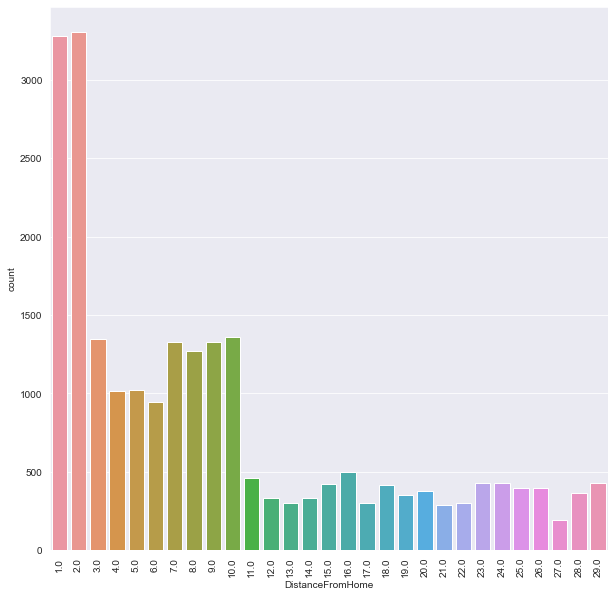

In [291]:
plt.figure(figsize=[10,10])
plt.xticks(rotation='vertical')
sns.countplot(df['DistanceFromHome'])

In [292]:
df.DistanceFromHome.dtype

dtype('float64')

In [293]:
categor_.columns

Index(['BusinessTravel', 'Department', 'DistanceFromHome', 'EducationField',
       'EmployeeCount', 'EmployeeNumber', 'Application ID', 'Gender',
       'HourlyRate', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'Over18', 'OverTime', 'PercentSalaryHike',
       'Employee Source'],
      dtype='object')

In [294]:
df.EducationField.value_counts()

Life Sciences       9578
Medical             7297
Marketing           2526
Technical Degree    2055
Other               1304
Human Resources      443
Test                   1
Name: EducationField, dtype: int64

In [295]:
def edufield(x):
    if  x=='Test':
        x='Other'
    return x

In [296]:
df.EducationField=df.EducationField.apply(edufield)

In [297]:
df.EducationField.value_counts()

Life Sciences       9578
Medical             7297
Marketing           2526
Technical Degree    2055
Other               1305
Human Resources      443
Name: EducationField, dtype: int64

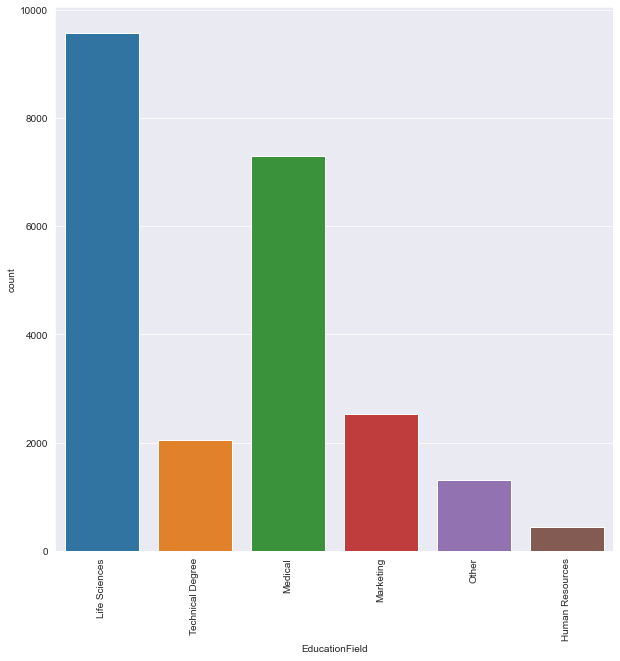

In [298]:
plt.figure(figsize=[10,10])
plt.xticks(rotation='vertical')
sns.countplot(df['EducationField'])

In [300]:
df.Gender.value_counts()

Male      13914
Female     9290
Name: Gender, dtype: int64

In [301]:
def gender(x):
    if x=='Male':
        x=1
    elif x=='Female':
        x=0
    return x

In [302]:
df.Gender=df.Gender.apply(gender)
df.Gender = pd.to_numeric(df.Gender,errors='coerce')


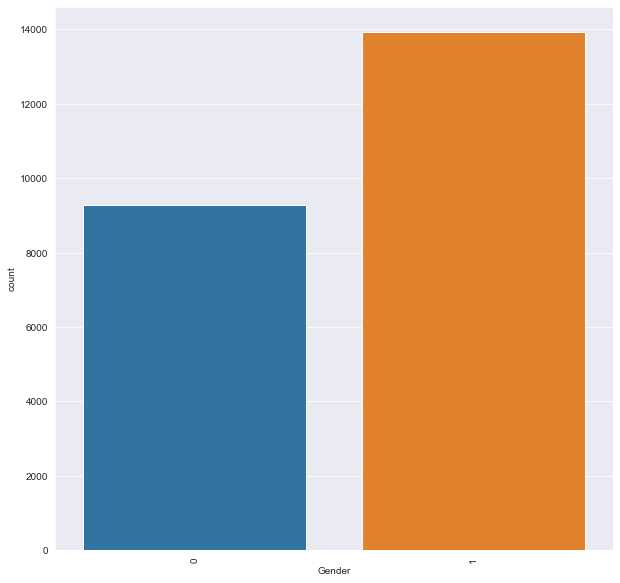

In [304]:
plt.figure(figsize=[10,10])
plt.xticks(rotation='vertical')
sns.countplot(df['Gender'])

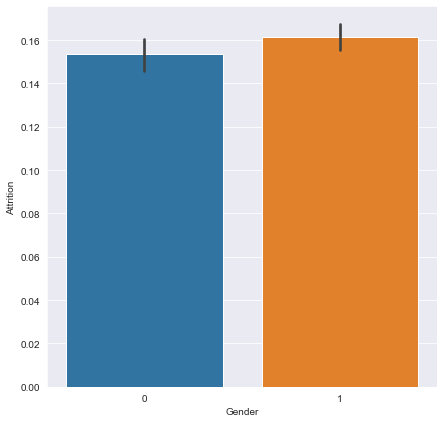

In [307]:
plt.figure(figsize=[7.,7])
sns.barplot(df.Gender,df.Attrition,data=df,hue_order='Attrition')

In [ ]:
#Attritio of Male is Higehr Compared With Female.

In [308]:
df.HourlyRate.value_counts()
df.HourlyRate = pd.to_numeric(df.HourlyRate,errors='coerce')

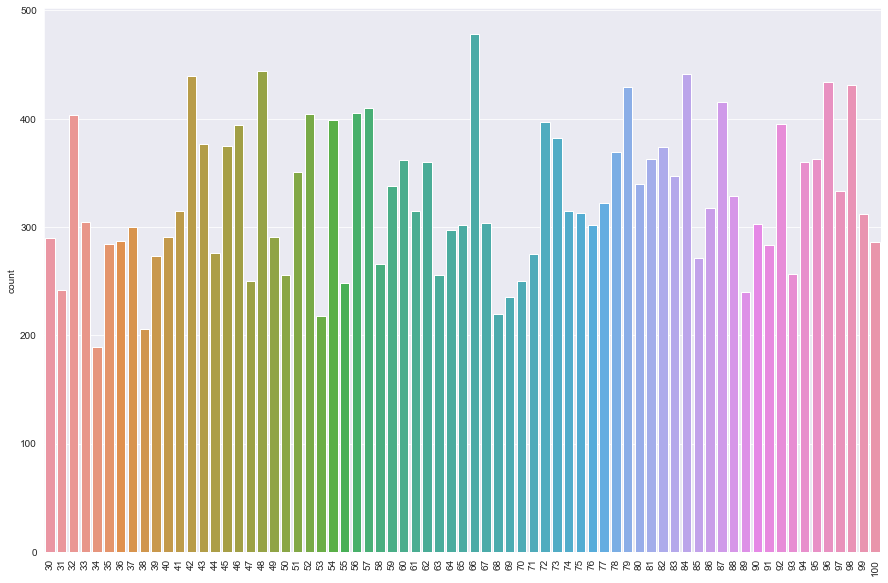

In [316]:
df.HourlyRate.value_counts()
plt.figure(figsize=[15,10])
plt.xticks(rotation='vertical')
sns.countplot(sorted(df['HourlyRate']))

In [61]:
df.JobRole.value_counts()

Sales Executive              5064
Research Scientist           4592
Laboratory Technician        4107
Manufacturing Director       2361
Healthcare Representative    2077
Manager                      1585
Sales Representative         1299
Research Director            1281
Human Resources               838
Name: JobRole, dtype: int64

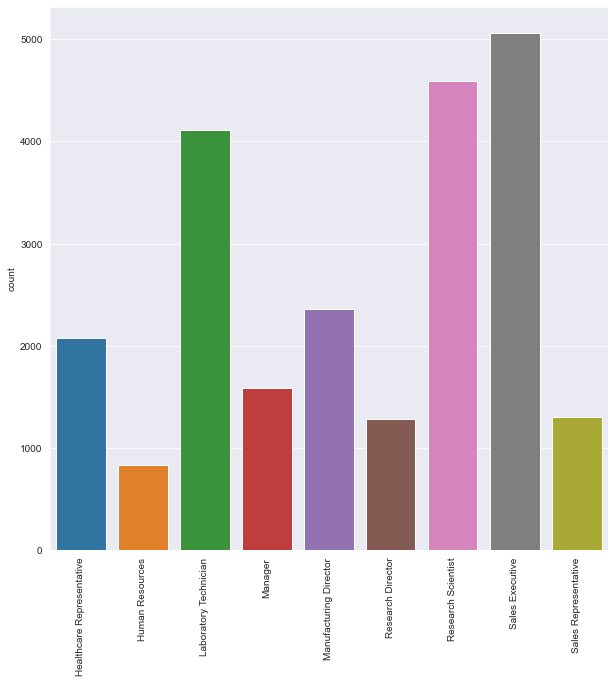

In [318]:
plt.figure(figsize=[10,10])
plt.xticks(rotation='vertical')
sns.countplot(sorted(df['JobRole']))

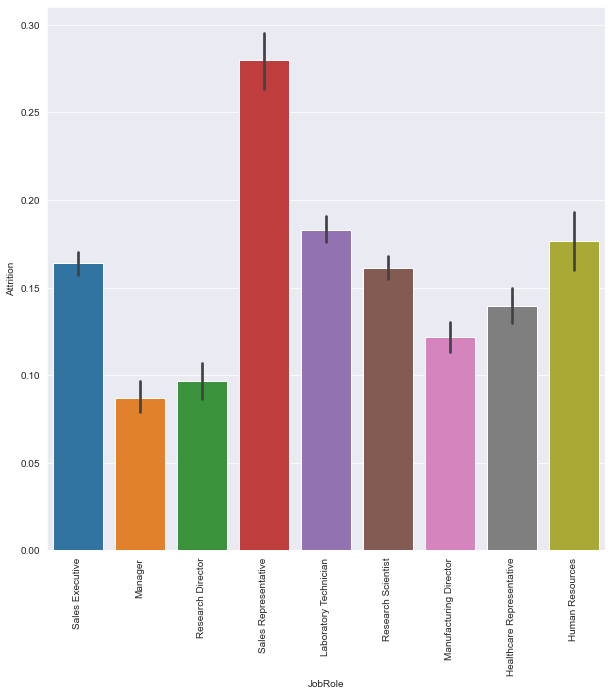

In [325]:
plt.figure(figsize=[10,10])
plt.xticks(rotation='vertical')
sns.barplot(df.JobRole,df.Attrition,data= df,ci=80,hue_order='attrition')

In [ ]:
#Here above we can see that Attrion of SalesRepresntative Is Much Higher.

In [62]:
df.JobSatisfaction.value_counts()

4    7216
3    7026
1    4560
2    4402
Name: JobSatisfaction, dtype: int64

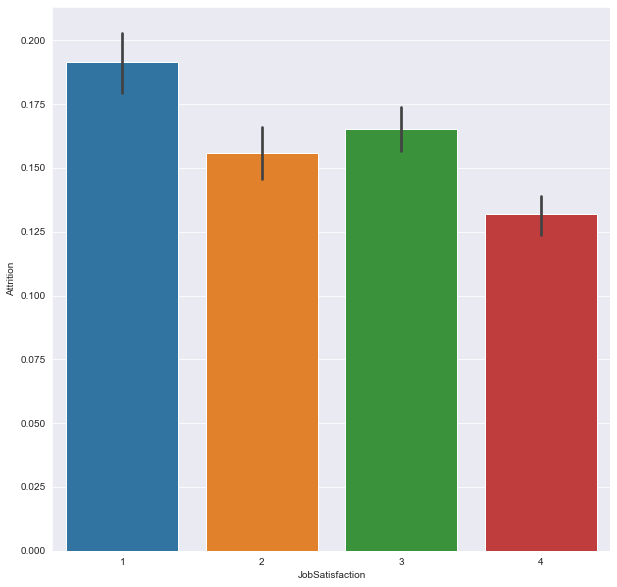

In [328]:
plt.figure(figsize=[10,10])
plt.xticks(rotation=0)
sns.barplot(df.JobSatisfaction,df.Attrition,data= df)

In [63]:
df.JobSatisfaction = pd.to_numeric(df.JobSatisfaction,errors='coerce')


In [64]:
df.MaritalStatus.value_counts()

Married     10613
Single       7425
Divorced     5166
Name: MaritalStatus, dtype: int64

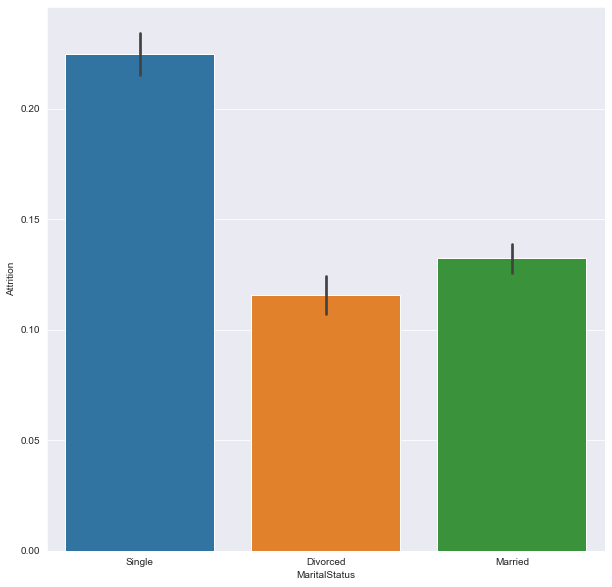

In [329]:
plt.figure(figsize=[10,10])
plt.xticks(rotation=0)
sns.barplot(df.MaritalStatus,df.Attrition,data= df)

In [336]:
#From Above Bar chart we can see that Employees those are single Whose Attrition Rate is Higher.

In [65]:
df.MonthlyIncome.value_counts()

2342     66
2559     54
2380     48
2741     48
6347     48
         ..
5980      8
19658     8
7260      8
10306     8
4559      7
Name: MonthlyIncome, Length: 1349, dtype: int64

In [66]:
df.MonthlyIncome = pd.to_numeric(df.MonthlyIncome,errors='coerce')


In [67]:
df.OverTime.value_counts()

No     16633
Yes     6571
Name: OverTime, dtype: int64

In [358]:
def overtime(x):
    if x=='Yes':
        x=1
    elif x=='No':
        x=0
    return x

In [359]:
df.OverTime=df.OverTime.apply(overtime)
df.OverTime = pd.to_numeric(df.OverTime,errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23204 entries, 0 to 23432
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition                 23204 non-null  int64  
 1   BusinessTravel            23204 non-null  object 
 2   DailyRate                 23204 non-null  float64
 3   Department                23204 non-null  object 
 4   DistanceFromHome          23204 non-null  float64
 5   Education                 23204 non-null  float64
 6   EducationField            23204 non-null  object 
 7   Application ID            23204 non-null  object 
 8   EnvironmentSatisfaction   23204 non-null  float64
 9   Gender                    23204 non-null  int64  
 10  HourlyRate                23204 non-null  int64  
 11  JobInvolvement            23204 non-null  float64
 12  JobLevel                  23204 non-null  float64
 13  JobRole                   23204 non-null  object 
 14  JobSat

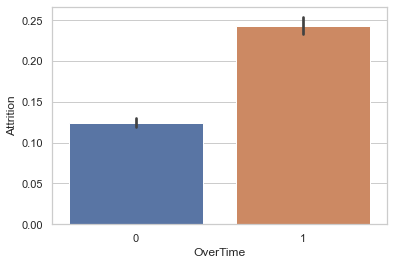

In [360]:
sns.barplot(df.OverTime,df.Attrition,data=df)

In [361]:
df.PercentSalaryHike.value_counts()
df.PercentSalaryHike = pd.to_numeric(df.PercentSalaryHike,errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23204 entries, 0 to 23432
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition                 23204 non-null  int64  
 1   BusinessTravel            23204 non-null  object 
 2   DailyRate                 23204 non-null  float64
 3   Department                23204 non-null  object 
 4   DistanceFromHome          23204 non-null  float64
 5   Education                 23204 non-null  float64
 6   EducationField            23204 non-null  object 
 7   Application ID            23204 non-null  object 
 8   EnvironmentSatisfaction   23204 non-null  float64
 9   Gender                    23204 non-null  int64  
 10  HourlyRate                23204 non-null  int64  
 11  JobInvolvement            23204 non-null  float64
 12  JobLevel                  23204 non-null  float64
 13  JobRole                   23204 non-null  object 
 14  JobSat

In [362]:
df['Employee Source'].value_counts()

Company Website    5355
Seek               3648
Indeed             2507
Jora               2397
LinkedIn           2314
Recruit.net        2306
GlassDoor          2157
Adzuna             2103
Referral            416
Test                  1
Name: Employee Source, dtype: int64

In [365]:
df['Employee Source'].value_counts()

Company Website    5355
Seek               3648
Indeed             2507
Jora               2397
LinkedIn           2314
Recruit.net        2306
GlassDoor          2157
Adzuna             2103
Referral            417
Name: Employee Source, dtype: int64

In [371]:
def empsou(x):
    if x=='Test':
        x='Referral'
    return x
df['Employee Source']= df['Employee Source'].apply(empsou)

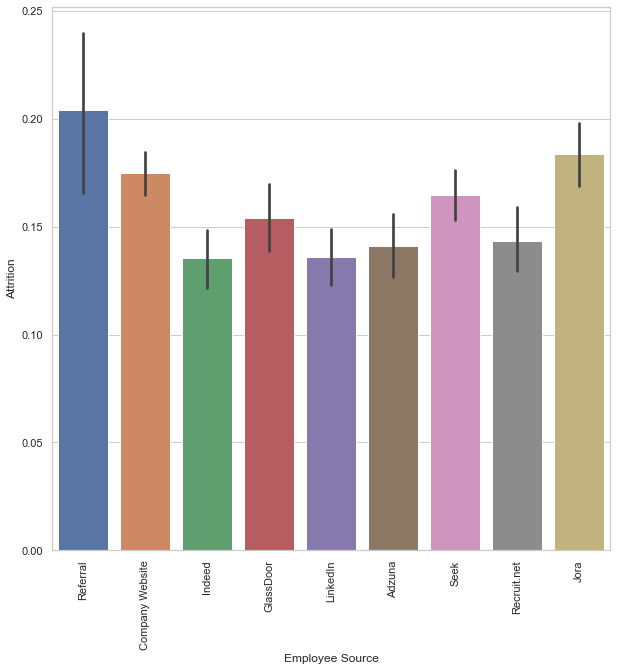

In [372]:
plt.figure(figsize=[10,10])
plt.xticks(rotation=90)
sns.barplot(df['Employee Source'],df.Attrition)

In [ ]:
#From refereal and jora Emp source is employees Attrition Is Higher. 

In [373]:
df=df.drop(['Application ID'],axis=1)

In [374]:
df.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source,Age_emp
0,1,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,2.0,0,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,7.0,1,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral,41.0
1,1,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,2.0,0,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,1,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral,41.0
2,1,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,2.0,0,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,7.0,1,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral,41.0
3,1,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,2.0,0,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,1,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral,41.0
4,1,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,2.0,0,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,7.0,1,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral,41.0


In [379]:
df.Attrition.value_counts()

0    19530
1     3674
Name: Attrition, dtype: int64

In [394]:
df.Attrition.shape

(23204,)

In [395]:
dfn=df.copy()
y=df.Attrition

In [380]:
df2=pd.get_dummies(df)
df2

,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_emp,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Divorced,...,MonthlyIncome_9362,MonthlyIncome_9380,MonthlyIncome_9396,MonthlyIncome_9419,MonthlyIncome_9434,MonthlyIncome_9439,MonthlyIncome_9525,MonthlyIncome_9526,MonthlyIncome_9547,MonthlyIncome_9582,MonthlyIncome_9602,MonthlyIncome_9610,MonthlyIncome_9613,MonthlyIncome_9619,MonthlyIncome_9637,MonthlyIncome_9667,MonthlyIncome_9679,MonthlyIncome_9699,MonthlyIncome_9705,MonthlyIncome_9713,MonthlyIncome_9714,MonthlyIncome_9715,MonthlyIncome_9724,MonthlyIncome_9725,MonthlyIncome_9738,MonthlyIncome_9756,MonthlyIncome_9824,MonthlyIncome_9852,MonthlyIncome_9854,MonthlyIncome_9884,MonthlyIncome_9888,MonthlyIncome_9907,MonthlyIncome_9924,MonthlyIncome_9936,MonthlyIncome_9950,MonthlyIncome_9957,MonthlyIncome_9980,MonthlyIncome_9981,MonthlyIncome_9985,MonthlyIncome_9991,MonthlyIncome_9998,Employee Source_Adzuna,Employee Source_Company Website,Employee Source_GlassDoor,Employee Source_Indeed,Employee Source_Jora,Employee Source_LinkedIn,Employee Source_Recruit.net,Employee Source_Referral,Employee Source_Seek
0,1,1102.0,1.0,2.0,2.0,0,94,3.0,2.0,19479.0,7.0,1,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,41.0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1,1102.0,1.0,2.0,2.0,0,94,3.0,2.0,19479.0,4.0,1,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,41.0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1,1102.0,1.0,2.0,2.0,0,94,3.0,2.0,19479.0,7.0,1,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,41.0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,1102.0,1.0,2.0,2.0,0,94,3.0,2.0,19479.0,4.0,1,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,41.0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1,1102.0,1.0,2.0,2.0,0,94,3.0,2.0,19479.0,7.0,1,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,41.0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23428,0,370.0,1.0,4.0,3.0,1,92,1.0,3.0,20467.0,0.0,0,20,4.0,3.0,1.0,19.0,2.0,4.0,1.0,0.0,0.0,0.0,60.0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
23429,0,370.0,1.0,4

In [381]:
df2.to_csv('HR_Analyst_File.csv', index=False)

In [382]:
df.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Employee Source,Age_emp
0,1,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,2.0,0,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,7.0,1,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral,41.0
1,1,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,2.0,0,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,1,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral,41.0
2,1,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,2.0,0,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,7.0,1,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral,41.0
3,1,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,2.0,0,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,4.0,1,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral,41.0
4,1,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,2.0,0,94,3.0,2.0,Sales Executive,4,Single,5993,19479.0,7.0,1,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,Referral,41.0


In [383]:
# Print all the data types and their unique values
for col in dfn.columns:
    if dfn[col].dtype=='object':
        print(color.BOLD+str(col)+color.END+ ' : '+str(dfn[col].unique()))
        print(dfn[col].value_counts())
        print('-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x')

BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        16457
Travel_Frequently     4376
Non-Travel            2371
Name: BusinessTravel, dtype: int64
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    15132
Sales                      7059
Human Resources            1013
Name: Department, dtype: int64
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x
EducationField : ['Life Sciences' 'Technical Degree' 'Medical' 'Marketing' 'Other'
 'Human Resources']
Life Sciences       9578
Medical             7297
Marketing           2526
Technical Degree    2055
Other               1305
Human Resources      443
Name: EducationField, dtype: int64
-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x
JobRole : ['Sales Executive' 'Manager' 'Research Directo

In [385]:
#<bold> Print all the data types and their unique values
for col in dfn.columns:
    if dfn[col].dtype=='int64' or dfn[col].dtype=='float64':
        print(color.BOLD+str(col)+color.END+ ' : '+str(dfn[col].unique()))
        print(dfn[col].value_counts())
        print('-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x')

DailyRate : [1102. 1360. 1356. 1085.  143.  906.  427.  334.  314.  167.  552.  802.
  857.  933.  465.  896. 1411.  247.  267. 1276.  483.  645. 1200.  509.
 1206.  548.  447.  642.  582.  930.  263.  840.  549. 1018.  918.  796.
  337.  256. 1283.  807. 1373.  504.  625. 1141.  370. 1040.  889.  558.
  408. 1115.  397. 1189.  290. 1372. 1107. 1305.  446.  663.  319. 1225.
 1017.  571.  228.  728. 1192.  309. 1319.  921.  977. 1063. 1439.  799.
  142.  482.  671.  161.  342. 1231. 1252.  124.  589.  367. 1462. 1413.
  674. 1470. 1278.  783. 1239.  230. 1306.  544.  812.  287. 1124. 1431.
  988.  699.  658. 1362.  296.  234.  790.  967.  254.  665.  829. 1346.
  419. 1065. 1031. 1153. 1069. 1354.  470.  303.  629.  878. 1303.  258.
 1397.  182. 1111.  702.  546. 1333.  618.  697. 1003. 1400. 1381.  648.
  943.  401. 1351.  204.  426. 1130. 1442.  678.  970. 1375.  511.  304.
  121. 1480.  216.  131.  937.  704.  669. 1320.  135.  507.  999.  285.
  404.  560. 1326.  971. 1440.  479.  6

In [396]:
dfn.drop('Attrition',axis=1,inplace=True)

In [397]:
dfnew=pd.get_dummies(dfn)
dfnew.shape

(23204, 1409)

In [398]:
dfn.to_csv('HR_Analyst_2.csv', index=False)

In [399]:
dfnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23204 entries, 0 to 23432
Columns: 1409 entries, DailyRate to Employee Source_Seek
dtypes: float64(19), int64(4), uint8(1386)
memory usage: 34.9 MB


In [400]:
X=dfnew

In [91]:
X

,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_emp,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Employee Source_Adzuna,Employee Source_Company Website,Employee Source_GlassDoor,Employee Source_Indeed,Employee Source_Jora,Employee Source_LinkedIn,Employee Source_Recruit.net,Employee Source_Referral,Employee Source_Seek
0,1102.0,1.0,2.0,2.0,0,94,3.0,2.0,4,5993,19479.0,7.0,1,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,41.0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
1,1102.0,1.0,2.0,2.0,0,94,3.0,2.0,4,5993,19479.0,4.0,1,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,41.0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,1102.0,1.0,2.0,2.0,0,94,3.0,2.0,4,5993,19479.0,7.0,1,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,41.0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
3,1102.0,1.0,2.0,2.0,0,94,3.0,2.0,4,5993,19479.0,4.0,1,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,41.0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
4,1102.0,1.0,2.0,2.0,0,94,3.0,2.0,4,5993,19479.0,7.0,1,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,41.0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23428,370.0,1.0,4.0,3.0,1,92,1.0,3.0,4,10883,20467.0,0.0,0,20,4.0,3.0,1.0,19.0,2.0,4.0,1.0,0.0,0.0,0.0,60.0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
23429,370.0,1.0,4.0,3.0,1,92,1.0,3.0,4,10883,20467.0,3.0,0,20,3.0,3.0,1.0,19.0,2.0,4.0,1.0,0.0,0.0,0.0,60.0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
23430,370.0,1.0,4.0,3.0,1,92,1.0,3.0,4,10883,20467.0,0.0,0,20,3.0,3.0,1.0,19.0,2.0,4.0,1.0,0.0,0.0,0.0,60.0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
23431,370.0,1.0,4.0,3.0,1,92,1.0,3.0,4,10883,20467.0,3.0,0,20,4.0,3.0,1.0,20.0,2.0,3.0,20.0,7.0,2.0,13.0,60.0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0


In [401]:
dfnew

,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Age_emp,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Divorced,MaritalStatus_Married,...,MonthlyIncome_9362,MonthlyIncome_9380,MonthlyIncome_9396,MonthlyIncome_9419,MonthlyIncome_9434,MonthlyIncome_9439,MonthlyIncome_9525,MonthlyIncome_9526,MonthlyIncome_9547,MonthlyIncome_9582,MonthlyIncome_9602,MonthlyIncome_9610,MonthlyIncome_9613,MonthlyIncome_9619,MonthlyIncome_9637,MonthlyIncome_9667,MonthlyIncome_9679,MonthlyIncome_9699,MonthlyIncome_9705,MonthlyIncome_9713,MonthlyIncome_9714,MonthlyIncome_9715,MonthlyIncome_9724,MonthlyIncome_9725,MonthlyIncome_9738,MonthlyIncome_9756,MonthlyIncome_9824,MonthlyIncome_9852,MonthlyIncome_9854,MonthlyIncome_9884,MonthlyIncome_9888,MonthlyIncome_9907,MonthlyIncome_9924,MonthlyIncome_9936,MonthlyIncome_9950,MonthlyIncome_9957,MonthlyIncome_9980,MonthlyIncome_9981,MonthlyIncome_9985,MonthlyIncome_9991,MonthlyIncome_9998,Employee Source_Adzuna,Employee Source_Company Website,Employee Source_GlassDoor,Employee Source_Indeed,Employee Source_Jora,Employee Source_LinkedIn,Employee Source_Recruit.net,Employee Source_Referral,Employee Source_Seek
0,1102.0,1.0,2.0,2.0,0,94,3.0,2.0,19479.0,7.0,1,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,41.0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,1102.0,1.0,2.0,2.0,0,94,3.0,2.0,19479.0,4.0,1,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,41.0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1102.0,1.0,2.0,2.0,0,94,3.0,2.0,19479.0,7.0,1,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,41.0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1102.0,1.0,2.0,2.0,0,94,3.0,2.0,19479.0,4.0,1,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,41.0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,1102.0,1.0,2.0,2.0,0,94,3.0,2.0,19479.0,7.0,1,11,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0,41.0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23428,370.0,1.0,4.0,3.0,1,92,1.0,3.0,20467.0,0.0,0,20,4.0,3.0,1.0,19.0,2.0,4.0,1.0,0.0,0.0,0.0,60.0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
23429,3

In [402]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Attrition, dtype: int64

In [403]:
X.shape,y.shape

((23204, 1409), (23204,))

In [404]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0)

In [406]:
from sklearn.ensemble  import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0,max_depth=5,min_samples_split=10000)
rf.fit(X_train,y_train)

0.84

In [407]:
#Accuracy
round(rf.score(X_train,y_train),2)

0.84

In [408]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,rf.predict(X_test) )
cm

array([[7770,    0],
       [1512,    0]], dtype=int64)

In [414]:
TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Model Testing Accuracy={}'.format(round((TP+TN)/(TP+TN+FP+FN)),10))

Model Testing Accuracy=1.0


# StandardScaler


In [415]:
logmodel = LogisticRegression()
smote=SMOTE(sampling_strategy='minority',random_state=3)
X_train_sm,y_train_sm=smote.fit_sample(X_train,y_train)
pd.Series(y_train_sm).value_counts()

1    11760
0    11760
Name: Attrition, dtype: int64

In [101]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve
def model_eval(algo,xtrain,xtest,ytrain,ytest):
    algo.fit(xtrain,ytrain)
    y_train_pred=algo.predict(xtrain)
    y_train_prob=algo.predict_proba(xtrain)[:,1]

    y_test_pred=algo.predict(xtest)
    y_test_prob=algo.predict_proba(xtest)[:,1]
    print(color.BOLD+"MODEL USED FOR CLASSIFICATION :"+color.END,algo)
    print(color.BOLD+'Confusion Matrix-Train:\n'+color.END,confusion_matrix(ytrain,y_train_pred))
    print(color.BOLD+'Accuracy Score-Train:\n'+color.END,accuracy_score(ytrain,y_train_pred))
    print(color.BOLD+'Classification Report-Train:\n'+color.END,classification_report(ytrain,y_train_pred))
    print(color.BOLD+'AUC Score-Train:\n'+color.END,roc_auc_score(ytrain,y_train_prob))
    print('\n')
    print(color.BOLD+'Confusion Matrix-Test:\n'+color.END,confusion_matrix(ytest,y_test_pred))
    print(color.BOLD+'Accuracy Score-Test:\n'+color.END,accuracy_score(ytest,y_test_pred))
    print(color.BOLD+'Classification Report-Test:\n'+color.END,classification_report(ytest,y_test_pred))
    print(color.BOLD+'AUC Score-Test:\n'+color.END,roc_auc_score(ytest,y_test_prob))
    print('\n')
    print(color.BOLD+'Plot'+color.END)
    fpr,tpr,thresholds= roc_curve(ytest,y_test_prob)
    fig,ax1 = plt.subplots()
    ax1.plot(fpr,tpr)
    ax1.plot(fpr,fpr)
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax2=ax1.twinx()
    ax2.plot(fpr,thresholds,'-g')
    ax2.set_ylabel('TRESHOLDS')
    plt.show()
    print('-x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x-')

In [102]:
lr=LogisticRegression()
knn=KNN()
rf=RandomForestClassifier()
svc=SVC()
rfc=RandomForestClassifier()
dt=DecisionTreeClassifier()
knn=KNN()
xgb=XGBClassifier()
adb=AdaBoostClassifier()
sgd=SGDClassifier()
gnb=GaussianNB()
et=ExtraTreesClassifier()
models=[]
models.append(('MVLC',lr))
models.append(('XGB',xgb))
models.append(('RFC',rf))
models.append(('DT',dt))
models.append(('ExtraTreesClassifier',et))
models.append(('KNNC',knn))
models.append(('AdaBoostClassifier',adb))
results=[]
names=[]
ypred=[]
for name,model in models:
    model.fit(X_train,y_train)
    ypred= model.predict(X_test)
    print(color.BOLD+name+color.END,'\n:')
    print(classification_report(y_test,ypred))
    kfold=KFold(shuffle=True,n_splits=10,random_state=0)
    cv_results=cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(color.BOLD+"%s: %f (%f)"%(name,np.mean(cv_results)*100,np.var(cv_results,ddof=1))+color.END)
    print('-x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x-')
    

MVLC 
:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      7770
           1       0.00      0.00      0.00      1512

    accuracy                           0.84      9282
   macro avg       0.42      0.50      0.46      9282
weighted avg       0.70      0.84      0.76      9282

MVLC: 84.470758 (0.000058)
-x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x-
XGB 
:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7770
           1       1.00      0.99      0.99      1512

    accuracy                           1.00      9282
   macro avg       1.00      0.99      1.00      9282
weighted avg       1.00      1.00      1.00      9282

XGB: 99.604962 (0.000004)
-x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x-
RFC 
:
              precision    recall  f1-score   sup

[0.07475042 0.05668598 0.02761942 0.0250979  0.00914193 0.05967329
 0.01581886 0.01508659 0.02280617 0.05875715 0.0450028  0.01245903
 0.02215834 0.03645288 0.00199866 0.02238026 0.01845189 0.04149199
 0.02654776 0.01826947 0.03311518 0.02598834 0.02406887 0.02599071
 0.09160466 0.00546954 0.01562988 0.00898942 0.00417835 0.01086824
 0.01198253 0.00112258 0.00444349 0.00272572 0.00490417 0.00200701
 0.00448162 0.00491793 0.0024539  0.00665201 0.00217935 0.00463316
 0.00225834 0.00604824 0.00656152 0.00506994 0.00580813 0.00634187
 0.01167024 0.00507522 0.00870499 0.00495841 0.00484223 0.00592146
 0.00417032 0.00433385 0.00304565 0.00613218]


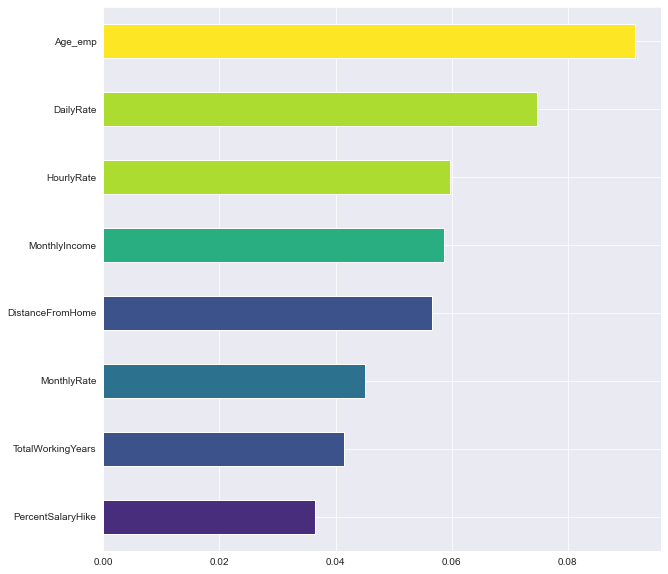

In [103]:
#plotting+feature importance in model
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier()
modelRF.fit(X,y)
modelRF.feature_importances_
print(modelRF.feature_importances_)
column_name = pd.Series(modelRF.feature_importances_,index=X.columns)
plt.figure(figsize =(10,10))
column_name.nlargest(8).sort_values(ascending=True).plot(kind='barh',color=my_cmap(my_norm(data)))
plt.show()

In [104]:
modelRF.feature_importances_.shape

(58,)

In [105]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve
def model_eval_2(algo,xtrain,xtest,ytrain,ytest):
    algo.fit(xtrain,ytrain)
    y_train_pred=algo.predict(xtrain)
    y_train_prob=algo.predict_proba(xtrain)[:,1]

    y_test_pred=algo.predict(xtest)
    y_test_prob=algo.predict_proba(xtest)[:,1]
    print(color.BOLD+"MODEL USED FOR CLASSIFICATION :"+color.END,algo)
    #print(color.BOLD+'Confusion Matrix-Train:\n'+color.END,confusion_matrix(ytrain,y_train_pred))
    print(color.BOLD+'Accuracy Score-Train:\n'+color.END,accuracy_score(ytrain,y_train_pred))
    
    print(color.BOLD+'AUC Score-Train:\n'+color.END,roc_auc_score(ytrain,y_train_prob))
    #print('\n')
    #print(color.BOLD+'Confusion Matrix-Test:\n'+color.END,confusion_matrix(ytest,y_test_pred))
    print(color.BOLD+'Accuracy Score-Test:\n'+color.END,accuracy_score(ytest,y_test_pred))
    #print(color.BOLD+'Classification Report-Test:\n'+color.END,classification_report(ytest,y_test_pred))
    print(color.BOLD+'AUC Score-Test:\n'+color.END,roc_auc_score(ytest,y_test_prob))
    #print('\n')
    #print(color.BOLD+'Plot'+color.END)
    print('-x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x-')
   

In [106]:
list1=[xgb,rf,dt,et,knn,adb]

In [111]:
ws=[]
wos=[]
for i in list1:
    print(color.BLUE+'WITH SMOTE'+color.END)
    [ws.append(model_eval_2(i,X_train_sm,X_test,y_train_sm,y_test))]
    print(color.BLUE+'WITHOUT SMOTE'+color.END)
    [wos.append(model_eval_2(i,X_train,X_test,y_train,y_test))]


WITH SMOTE
MODEL USED FOR CLASSIFICATION : XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Accuracy Score-Train:
 0.9997874149659864
AUC Score-Train:
 0.9999999783076496
Accuracy Score-Test:
 0.9953673777203189
AUC Score-Test:
 0.9994048470238946
-x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x-
WITHOUT SMOTE
MODEL USED FOR CLASSIFICATION : XGBClassifier(base_score=0.5, booster='gbtree', colsample_byle

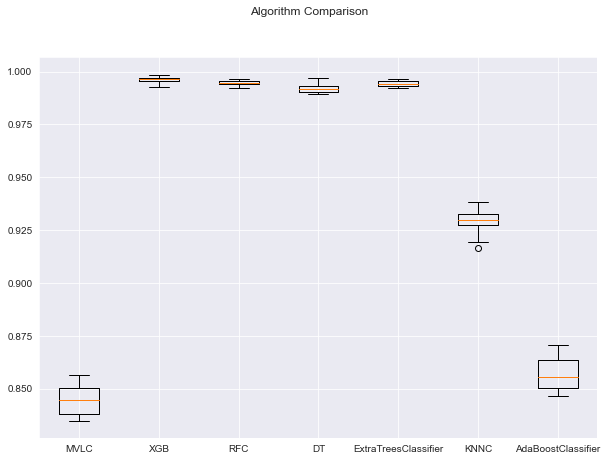

In [113]:
#Model Comparision With Box plots.

fig = plt.figure(figsize=[10,7])
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [114]:
#There Is not Much Difference WHile doing SMOTE and Without SMOTE which is Oversampling Techinique.

In [115]:
models=[dt,adb,et,rf,xgb]

DecisionTreeClassifier()


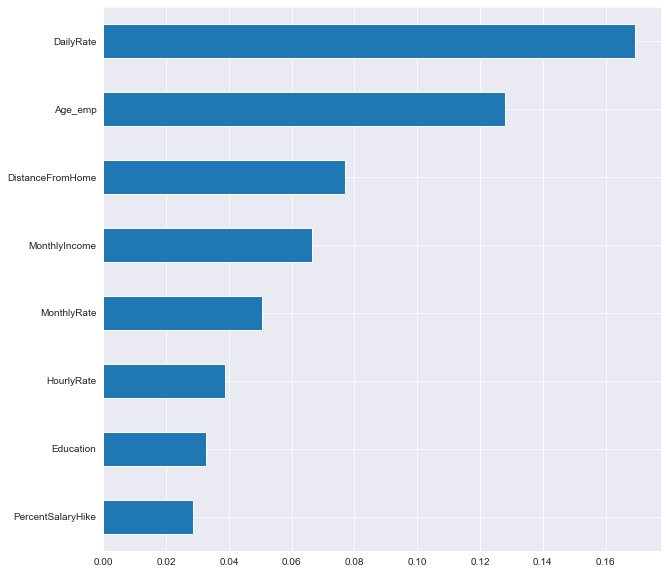

AdaBoostClassifier()


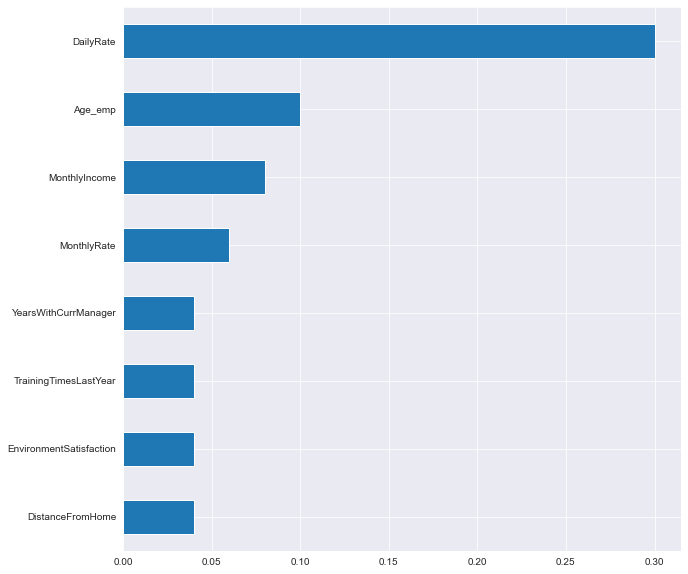

ExtraTreesClassifier()


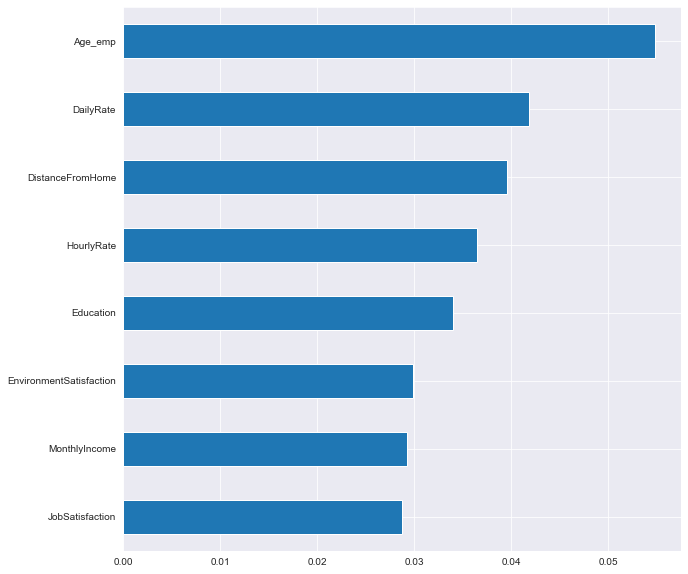

RandomForestClassifier()


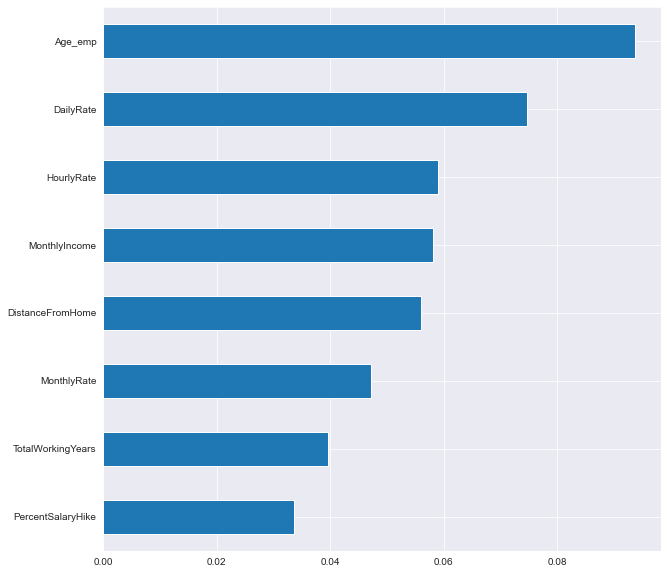

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


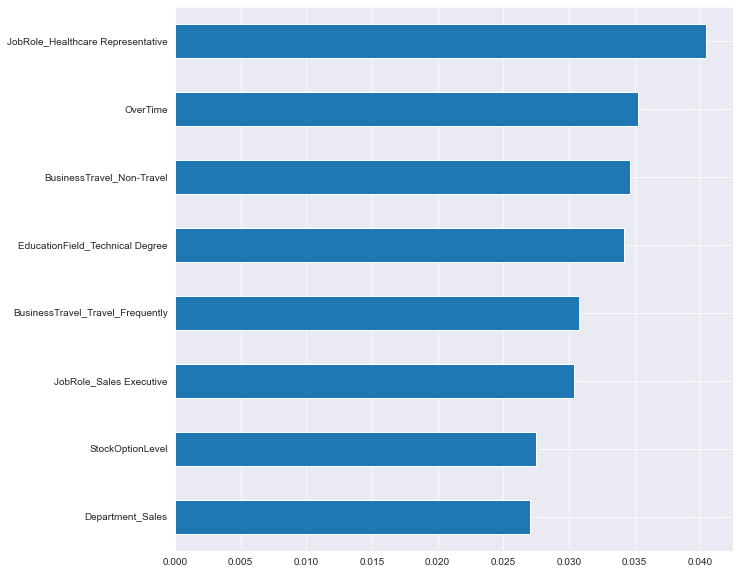

In [116]:
for i in models:
    i.fit(X,y)
    i.feature_importances_
    print(i)
    #Plot the data:
    #my_colors = 'rgbkymc'  #red, green, blue, black, etc.
    feature_ranks = pd.Series(i.feature_importances_,index=X.columns)
    plt.figure(figsize =(10,10))
    feature_ranks.nlargest(8).sort_values(ascending=True).plot(kind='barh')

    plt.show()

In [117]:
a=[]
for i in models:
    i.fit(X,y)
    i.feature_importances_
    imp_features = pd.Series(i.feature_importances_,index=X.columns)
    x = pd.DataFrame(imp_features.nlargest(8).sort_values(ascending=False))
    #print(i,'\n',x.index.values,'\n')
    a.append(x.index.values)
    b=pd.DataFrame(a)
    c=b.T

In [118]:
d=pd.DataFrame()
for i in c.columns:
    d=pd.concat([d,c[i]],ignore_index=True)
print(d)
d = d.rename(columns={0: 'Imp_Features'})
d['Imp_Features'].value_counts()

                                    0
0                           DailyRate
1                             Age_emp
2                    DistanceFromHome
3                       MonthlyIncome
4                          HourlyRate
5                         MonthlyRate
6                           Education
7               TrainingTimesLastYear
8                           DailyRate
9                             Age_emp
10                      MonthlyIncome
11                        MonthlyRate
12               YearsWithCurrManager
13              TrainingTimesLastYear
14            EnvironmentSatisfaction
15                   DistanceFromHome
16                            Age_emp
17                          DailyRate
18                   DistanceFromHome
19                         HourlyRate
20                          Education
21            EnvironmentSatisfaction
22                      MonthlyIncome
23                  TotalWorkingYears
24                            Age_emp
25          

DistanceFromHome                     4
DailyRate                            4
Age_emp                              4
MonthlyIncome                        4
MonthlyRate                          3
HourlyRate                           3
TotalWorkingYears                    2
EnvironmentSatisfaction              2
Education                            2
TrainingTimesLastYear                2
Department_Sales                     1
JobRole_Sales Executive              1
StockOptionLevel                     1
JobRole_Healthcare Representative    1
PercentSalaryHike                    1
BusinessTravel_Non-Travel            1
OverTime                             1
YearsWithCurrManager                 1
EducationField_Technical Degree      1
BusinessTravel_Travel_Frequently     1
Name: Imp_Features, dtype: int64

In [119]:
new_X=dfnew[['DailyRate', 'Age_emp', 'DistanceFromHome', 'MonthlyIncome',
       'TrainingTimesLastYear', 'TotalWorkingYears', 'MonthlyRate',
       'HourlyRate', 'PercentSalaryHike','BusinessTravel_Travel_Frequently', 'OverTime', 'StockOptionLevel']]
new_X

,DailyRate,Age_emp,DistanceFromHome,MonthlyIncome,TrainingTimesLastYear,TotalWorkingYears,MonthlyRate,HourlyRate,PercentSalaryHike,BusinessTravel_Travel_Frequently,OverTime,StockOptionLevel
0,1102.0,41.0,1.0,5993,0.0,8.0,19479.0,94,11,0,1,0.0
1,1102.0,41.0,1.0,5993,0.0,8.0,19479.0,94,11,0,1,0.0
2,1102.0,41.0,1.0,5993,0.0,8.0,19479.0,94,11,0,1,0.0
3,1102.0,41.0,1.0,5993,0.0,8.0,19479.0,94,11,0,1,0.0
4,1102.0,41.0,1.0,5993,0.0,8.0,19479.0,94,11,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
23428,370.0,60.0,1.0,10883,2.0,19.0,20467.0,92,20,0,0,1.0
23429,370.0,60.0,1.0,10883,2.0,19.0,20467.0,92,20,0,0,1.0
23430,370.0,60.0,1.0,10883,2.0,19.0,20467.0,92,20,0,0,1.0
23431,370.0,60.0,1.0,10883,2.0,20.0,20467.0,92,20,0,0,1.0


In [120]:
new_y=df['Attrition']
new_y

0        1
1        1
2        1
3        1
4        1
        ..
23428    0
23429    0
23430    0
23431    0
23432    0
Name: Attrition, Length: 23204, dtype: int64

In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( new_X, new_y, test_size=0.4, random_state=0)

In [122]:
from sklearn.ensemble  import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=1000,criterion='gini',random_state=0,max_depth=5,min_samples_split=10000)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)

0.8447062203706364

In [123]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,rf.predict(X_test) )
cm

array([[7770,    0],
       [1512,    0]], dtype=int64)

In [124]:
TN=cm[0][0]
TP=cm[1][1]
FN=cm[1][0]
FP=cm[0][1]
print('Model Testing Accuracy={}'.format((TP+TN)/(TP+TN+FP+FN)))

Model Testing Accuracy=0.8371040723981901


In [125]:
logmodel = LogisticRegression()
smote=SMOTE(sampling_strategy='minority',random_state=3)
X_train_sm,y_train_sm=smote.fit_sample(X_train,y_train)
pd.Series(y_train_sm).value_counts()

1    11760
0    11760
Name: Attrition, dtype: int64

In [126]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve
def model_eval(algo,xtrain,xtest,ytrain,ytest):
    algo.fit(xtrain,ytrain)
    y_train_pred=algo.predict(xtrain)
    y_train_prob=algo.predict_proba(xtrain)[:,1]

    y_test_pred=algo.predict(xtest)
    y_test_prob=algo.predict_proba(xtest)[:,1]
    print(color.BOLD+"MODEL USED FOR CLASSIFICATION :"+color.END,algo)
    print(color.BOLD+'Confusion Matrix-Train:\n'+color.END,confusion_matrix(ytrain,y_train_pred))
    print(color.BOLD+'Accuracy Score-Train:\n'+color.END,accuracy_score(ytrain,y_train_pred))
    print(color.BOLD+'Classification Report-Train:\n'+color.END,classification_report(ytrain,y_train_pred))
    print(color.BOLD+'AUC Score-Train:\n'+color.END,roc_auc_score(ytrain,y_train_prob))
    print('\n')
    print(color.BOLD+'Confusion Matrix-Test:\n'+color.END,confusion_matrix(ytest,y_test_pred))
    print(color.BOLD+'Accuracy Score-Test:\n'+color.END,accuracy_score(ytest,y_test_pred))
    print(color.BOLD+'Classification Report-Test:\n'+color.END,classification_report(ytest,y_test_pred))
    print(color.BOLD+'AUC Score-Test:\n'+color.END,roc_auc_score(ytest,y_test_prob))
    print('\n')
    print(color.BOLD+'Plot'+color.END)
    fpr,tpr,thresholds= roc_curve(ytest,y_test_prob)
    fig,ax1 = plt.subplots()
    ax1.plot(fpr,tpr)
    ax1.plot(fpr,fpr)
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax2=ax1.twinx()
    ax2.plot(fpr,thresholds,'-g')
    ax2.set_ylabel('TRESHOLDS')
    plt.show()
    print('-x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x-')

In [127]:
lr=LogisticRegression()
knn=KNN()
rf=RandomForestClassifier()
svc=SVC()
rfc=RandomForestClassifier()
dt=DecisionTreeClassifier()
xgb=XGBClassifier()
et=ExtraTreesClassifier()
models=[]
models.append(('MVLC',lr))
models.append(('XGB',xgb))
models.append(('KNNC',knn))
models.append(('RFC',rf))
models.append(('ExtraTreesClassifier',et))
models.append(('DT',dt))
results=[]
names=[]
ypred=[]
for name,model in models:
    model.fit(X_train,y_train)
    ypred= model.predict(X_test)
    print(color.BOLD+name+color.END,'\n')
    print(classification_report(y_test,ypred))
    kfold=KFold(shuffle=True,n_splits=10,random_state=0)
    cv_results=cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print(color.BOLD+"%s: %f (%f)"%(name,np.mean(cv_results)*100,np.var(cv_results,ddof=1))+color.END)
    print('\n')
    print(color.BOLD+'Plot'+color.END)
    print('-x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x-')
    

MVLC 

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      7770
           1       0.00      0.00      0.00      1512

    accuracy                           0.84      9282
   macro avg       0.42      0.50      0.46      9282
weighted avg       0.70      0.84      0.76      9282

MVLC: 84.470758 (0.000057)


Plot
-x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x-
XGB 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7770
           1       1.00      0.98      0.99      1512

    accuracy                           1.00      9282
   macro avg       1.00      0.99      1.00      9282
weighted avg       1.00      1.00      1.00      9282

XGB: 99.511582 (0.000002)


Plot
-x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x-
KNNC 

              precision    recall  f1

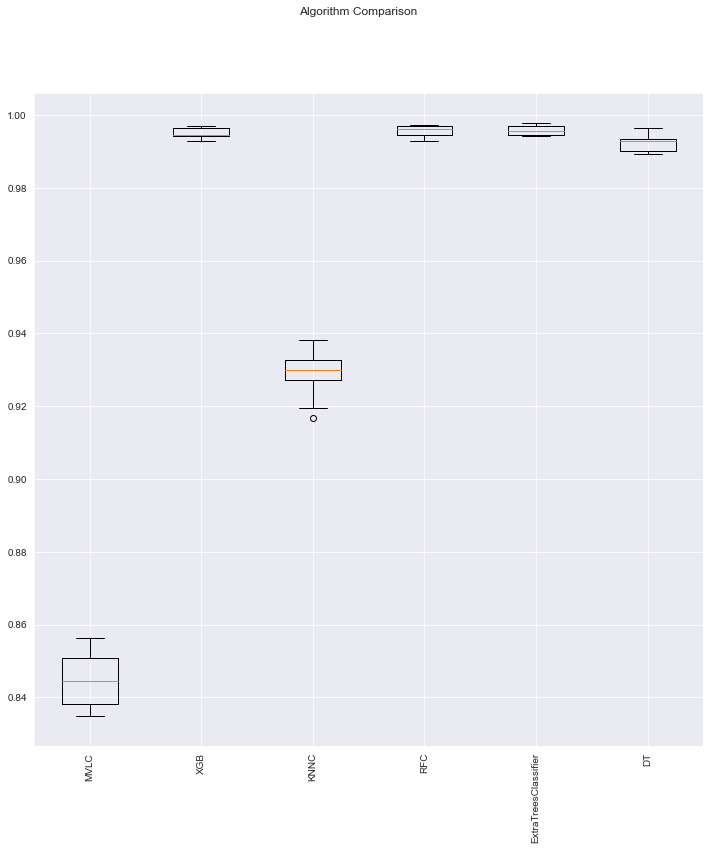

In [128]:
#ADD THIS IN ABOVE CODE

fig = plt.figure(figsize=[12,12])
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=90)
plt.show()

# HyperTuning Random Forest

Confusion Matrix-Train
 [[11759     1]
 [  528  1634]]
Accuracy Score-Train
 0.9620025858353685
Classification Report-Train
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     11760
           1       1.00      0.76      0.86      2162

    accuracy                           0.96     13922
   macro avg       0.98      0.88      0.92     13922
weighted avg       0.96      0.96      0.96     13922

AUC Score-Train
 0.9988150695060634



Confusion Matrix-Test
 [[7769    1]
 [ 576  936]]
Accuracy Score-Test
 0.9378366731307908
Classification Report-Test
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      7770
           1       1.00      0.62      0.76      1512

    accuracy                           0.94      9282
   macro avg       0.96      0.81      0.86      9282
weighted avg       0.94      0.94      0.93      9282

AUC Score-Test
 0.9954423811566668




Plot : AUC-ROC Curve


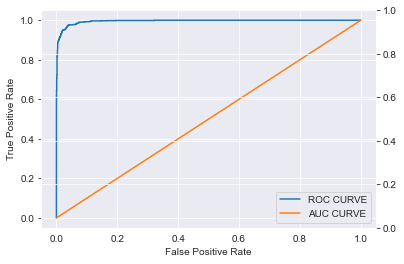

In [129]:
from sklearn.model_selection import GridSearchCV
rfgridcv=GridSearchCV(estimator=RandomForestClassifier(),
param_grid=[{'n_estimators': [5,10,50],
                               'max_depth':[5,10,15,20],
                               'min_samples_leaf':[10,50,100],
                               'min_samples_split': [20,100,200]}])
rfgridcv.fit(X_train,y_train)
y_train_pred=rfgridcv.predict(X_train)
y_train_prob=rfgridcv.predict_proba(X_train)[:,1]

y_test_pred=rfgridcv.predict(X_test)
y_test_prob=rfgridcv.predict_proba(X_test)[:,1]

print('Confusion Matrix-Train\n',confusion_matrix(y_train,y_train_pred))
print('Accuracy Score-Train\n',accuracy_score(y_train,y_train_pred))
print('Classification Report-Train\n',classification_report(y_train,y_train_pred))
print('AUC Score-Train\n',roc_auc_score(y_train,y_train_prob))
print('\n'*2)
print('Confusion Matrix-Test\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score-Test\n',accuracy_score(y_test,y_test_pred))
print('Classification Report-Test\n',classification_report(y_test,y_test_pred))
print('AUC Score-Test\n',roc_auc_score(y_test,y_test_prob))
print('\n'*3)
print('Plot : AUC-ROC Curve')
fpr,tpr,thresholds= roc_curve(y_test,y_test_prob)
thresholds[0] = thresholds[0]-1
fig,ax1 = plt.subplots()
ax1.plot(fpr,tpr,label='ROC CURVE')
ax1.plot(fpr,fpr,label='AUC CURVE')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
plt.legend(loc='best')
ax2=ax1.twinx()
plt.show()

In [130]:
rfgrid=GridSearchCV(estimator=RandomForestClassifier(),
                   param_grid=[{'n_estimators': [5,10,50],
                               'max_depth':[5,10,15,20],
                               'min_samples_leaf':[10,50,100],
                               'min_samples_split': [20,100,200]}])

In [131]:
rfgrid_fit=rfgrid.fit(X_train,y_train)
rfgrid_fit

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [5, 10, 15, 20],
                          'min_samples_leaf': [10, 50, 100],
                          'min_samples_split': [20, 100, 200],
                          'n_estimators': [5, 10, 50]}])

In [132]:
print(rfgrid_fit.best_estimator_)

RandomForestClassifier(max_depth=20, min_samples_leaf=10, min_samples_split=20,
                       n_estimators=50)


In [133]:
rfgrid_score=rfgrid_fit.score(X_train,y_train)
rfgrid_score

0.9596322367475938

In [134]:
# Randomised Search

Confusion Matrix-Train
 [[11758     2]
 [  624  1538]]
Accuracy Score-Train
 0.9550351960925154
Classification Report-Train
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     11760
           1       1.00      0.71      0.83      2162

    accuracy                           0.96     13922
   macro avg       0.97      0.86      0.90     13922
weighted avg       0.96      0.96      0.95     13922

AUC Score-Train
 0.9984451597475252



Confusion Matrix-Test
 [[7768    2]
 [ 648  864]]
Accuracy Score-Test
 0.9299719887955182
Classification Report-Test
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      7770
           1       1.00      0.57      0.73      1512

    accuracy                           0.93      9282
   macro avg       0.96      0.79      0.84      9282
weighted avg       0.94      0.93      0.92      9282

AUC Score-Test
 0.9947876447876449




Plot : AUC-ROC Curve


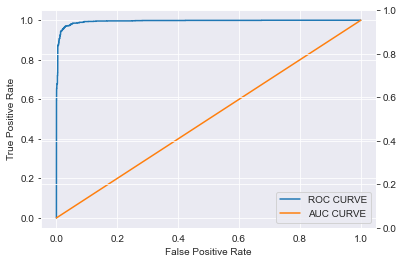

In [136]:

from sklearn.model_selection import RandomizedSearchCV
rfrs_cv=RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions=[{'n_estimators': [5,10,50],
                               'max_depth':[5,10,15,20],
                               'min_samples_leaf':[10,50,100],
                               'min_samples_split': [20,100,200]}])
rfrs_cv.fit(X_train,y_train)
y_train_pred=rfrs_cv.predict(X_train)
y_train_prob=rfrs_cv.predict_proba(X_train)[:,1]

y_test_pred=rfrs_cv.predict(X_test)
y_test_prob=rfrs_cv.predict_proba(X_test)[:,1]

print('Confusion Matrix-Train\n',confusion_matrix(y_train,y_train_pred))
print('Accuracy Score-Train\n',accuracy_score(y_train,y_train_pred))
print('Classification Report-Train\n',classification_report(y_train,y_train_pred))
print('AUC Score-Train\n',roc_auc_score(y_train,y_train_prob))
print('\n'*2)
print('Confusion Matrix-Test\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score-Test\n',accuracy_score(y_test,y_test_pred))
print('Classification Report-Test\n',classification_report(y_test,y_test_pred))
print('AUC Score-Test\n',roc_auc_score(y_test,y_test_prob))
print('\n'*3)
print('Plot : AUC-ROC Curve')
fpr,tpr,thresholds= roc_curve(y_test,y_test_prob)
thresholds[0] = thresholds[0]-1
fig,ax1 = plt.subplots()
ax1.plot(fpr,tpr,label='ROC CURVE')
ax1.plot(fpr,fpr,label='AUC CURVE')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
plt.legend(loc='best')
ax2=ax1.twinx()
plt.show()

In [137]:
rfrandomized=RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions=[{'n_estimators': [5,10,50],
                               'max_depth':[5,10,15,20],
                               'min_samples_leaf':[10,50,100],
                               'min_samples_split': [20,100,200]}])

In [138]:
rfrand_fit=rfrandomized.fit(X_train,y_train)
rfrand_fit

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions=[{'max_depth': [5, 10, 15, 20],
                                         'min_samples_leaf': [10, 50, 100],
                                         'min_samples_split': [20, 100, 200],
                                         'n_estimators': [5, 10, 50]}])

In [139]:
print(rfrand_fit.best_estimator_)

RandomForestClassifier(max_depth=20, min_samples_leaf=10, min_samples_split=20,
                       n_estimators=50)


In [140]:
rfrand_score=rfrand_fit.score(X_train,y_train)
rfrand_score

0.9602786955897141

In [ ]:
#After Finding Best Estimaters from Both CVs

In [ ]:
#Both Hypertunning Models gives the same Estimaters for RandomForestClassifier

Confusion Matrix-Train
 [[11760     0]
 [  571  1591]]
Accuracy Score-Train
 0.9589857779054733
Classification Report-Train
               precision    recall  f1-score   support

           0       0.95      1.00      0.98     11760
           1       1.00      0.74      0.85      2162

    accuracy                           0.96     13922
   macro avg       0.98      0.87      0.91     13922
weighted avg       0.96      0.96      0.96     13922

AUC Score-Train
 0.9989126501664495



Confusion Matrix-Test
 [[7768    2]
 [ 604  908]]
Accuracy Score-Test
 0.9347123464770524
Classification Report-Test
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      7770
           1       1.00      0.60      0.75      1512

    accuracy                           0.93      9282
   macro avg       0.96      0.80      0.86      9282
weighted avg       0.94      0.93      0.93      9282

AUC Score-Test
 0.9950371289657003




Plot : AUC-ROC Curve


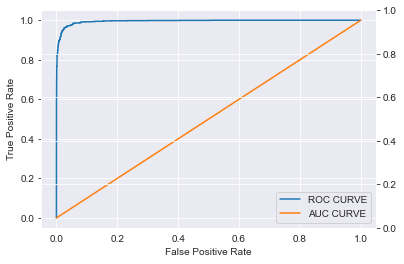

In [141]:
from sklearn.model_selection import RandomizedSearchCV
rfrs_cv=RandomForestClassifier(max_depth=20, min_samples_leaf=10, min_samples_split=20,
                       n_estimators=50)
rfrs_cv.fit(X_train,y_train)
y_train_pred=rfrs_cv.predict(X_train)
y_train_prob=rfrs_cv.predict_proba(X_train)[:,1]

y_test_pred=rfrs_cv.predict(X_test)
y_test_prob=rfrs_cv.predict_proba(X_test)[:,1]

print('Confusion Matrix-Train\n',confusion_matrix(y_train,y_train_pred))
print('Accuracy Score-Train\n',accuracy_score(y_train,y_train_pred))
print('Classification Report-Train\n',classification_report(y_train,y_train_pred))
print('AUC Score-Train\n',roc_auc_score(y_train,y_train_prob))
print('\n'*2)
print('Confusion Matrix-Test\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score-Test\n',accuracy_score(y_test,y_test_pred))
print('Classification Report-Test\n',classification_report(y_test,y_test_pred))
print('AUC Score-Test\n',roc_auc_score(y_test,y_test_prob))
print('\n'*3)
print('Plot : AUC-ROC Curve')
fpr,tpr,thresholds= roc_curve(y_test,y_test_prob)
thresholds[0] = thresholds[0]-1
fig,ax1 = plt.subplots()
ax1.plot(fpr,tpr,label='ROC CURVE')
ax1.plot(fpr,fpr,label='AUC CURVE')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
plt.legend(loc='best')
ax2=ax1.twinx()
plt.show()

* So After applying Hypertunning with best Estimators 
* I have got Train and Test Accuracy of
    Train = 0.96 &
    Test  = 0.94
* This Accuracy Neither Overfit nor Underfit.
* Its Balanced Accuracy So this is The Best Generalized Model for Model Builduing.